In this part, a process control system is presented based on Fuzzy Logic, which is known as Fuzzy Inference System

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e2690d9f99852c6af0144ea28a7193a02ddbddb36bf07d2ef891e924a561e9cd
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**CASE STUDY: TEMPERATURE CONTROL**

This notebook presents a controller for the heater fan, which receives the inputs of setpoint and temperature sensors, and output the PWM to control the fan speed.\
The higher PMW, the faster motor speed, thus the warmer environment

**Instance:** Setpoint

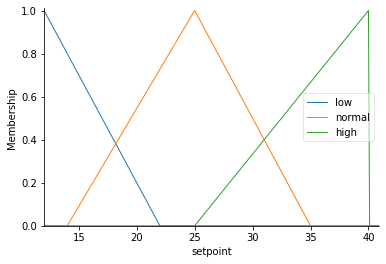

In [ ]:
# Creat Antecedent - The Setpoint
setpoint = ctrl.Antecedent(np.arange(12.0, 41.0, 0.1), 'setpoint')

# Create fuzzy sets of Antecedent
setpoint['low'] = fuzz.trimf(setpoint.universe, [12.0, 12.0, 22.0])
setpoint['normal'] = fuzz.trimf(setpoint.universe, [14.0, 25.0, 35.0])
setpoint['high'] = fuzz.trimf(setpoint.universe, [25.0, 40.0, 40.0])

# Take a look
setpoint.view()

**Instance:** Sensor

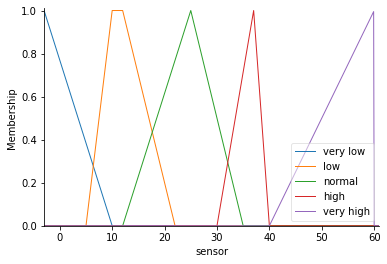

In [ ]:
# Creat Antecedent - The Setpoint
sensor = ctrl.Antecedent(np.arange(-3.0, 61.0, 0.1), 'sensor')

# Create fuzzy sets of Antecedent
sensor['very low']  = fuzz.trimf(sensor.universe, [-3.0, -3.0, 10.0])
sensor['low']       = fuzz.trapmf(sensor.universe, [5.0, 10.0, 12.0, 22.0])
sensor['normal']    = fuzz.trimf(sensor.universe, [12.0, 25.0, 35.0])
sensor['high']      = fuzz.trimf(sensor.universe, [30.0, 37.0, 40.0])
sensor['very high'] = fuzz.trimf(sensor.universe, [40.0, 60.0, 60.0])

# Take a look
sensor.view()

**Output:** PWM

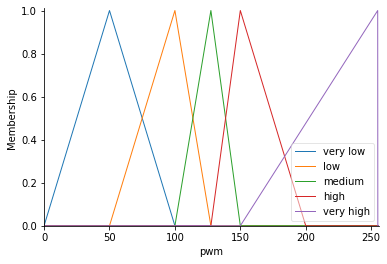

In [ ]:
# Creat Consequent - The PWM
pwm = ctrl.Consequent(np.arange(0.0, 256.0, 0.1), 'pwm')

# Create fuzzy sets of Consequent
pwm['very low']  = fuzz.trimf(pwm.universe, [0.0, 50.0, 100.0])
pwm['low']       = fuzz.trimf(pwm.universe, [50.0, 100.0, 127.5])
pwm['medium']    = fuzz.trimf(pwm.universe, [100.0, 127.5, 150.0])
pwm['high']      = fuzz.trimf(pwm.universe, [127.5, 150.0, 200.0])
pwm['very high'] = fuzz.trimf(pwm.universe, [150.0, 255.0, 255.0])

# Take a look
pwm.view()

**Inference Rules**

In [ ]:
# Making rules list
rules_lst = [ctrl.Rule(setpoint['low']&sensor['very low'], pwm['high']),         # Low setpoint
             ctrl.Rule(setpoint['low']&sensor['low'], pwm['medium']),
             ctrl.Rule(setpoint['low']&sensor['normal'], pwm['low']),
             ctrl.Rule(setpoint['low']&sensor['high'], pwm['very low']),
             ctrl.Rule(setpoint['low']&sensor['very high'], pwm['very low']),
             ctrl.Rule(setpoint['normal']&sensor['very low'], pwm['very high']), # Normal setpoint
             ctrl.Rule(setpoint['normal']&sensor['low'], pwm['high']),
             ctrl.Rule(setpoint['normal']&sensor['normal'], pwm['medium']),
             ctrl.Rule(setpoint['normal']&sensor['high'], pwm['low']),
             ctrl.Rule(setpoint['normal']&sensor['very high'], pwm['very low']),
             ctrl.Rule(setpoint['high']&sensor['very low'], pwm['very high']),   # High setpoint
             ctrl.Rule(setpoint['high']&sensor['low'], pwm['high']),
             ctrl.Rule(setpoint['high']&sensor['normal'], pwm['high']),
             ctrl.Rule(setpoint['high']&sensor['high'], pwm['medium']),
             ctrl.Rule(setpoint['high']&sensor['very high'], pwm['very low']),
            ]

**Train the System and make Predictions**

Train System

In [ ]:
# Train the system
tempFIS_predictor = ctrl.ControlSystem(rules_lst)
tempFIS_pred = ctrl.ControlSystemSimulation(tempFIS_predictor)

Make Predictions

Predicted: 137.17106955709139


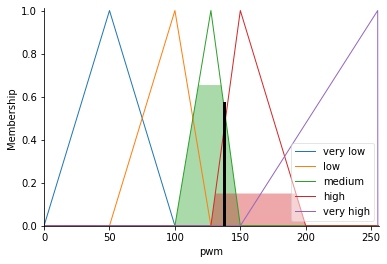

In [ ]:
# Test an instance
tempFIS_pred.input['setpoint'] =  25.2    # Setpoint: 25.2 degree Celsius
tempFIS_pred.input['sensor']   =  20.5    # Read from sensor: 20.5 degree Celsius
tempFIS_pred.compute()

# Print
temp_res = tempFIS_pred.output['pwm']
dis_str = "Predicted: {val}".format(val = temp_res)   # Print predicted value
print(dis_str)
pwm.view(sim = tempFIS_pred)   # Display on graph

Predicted: 50.00000000000019


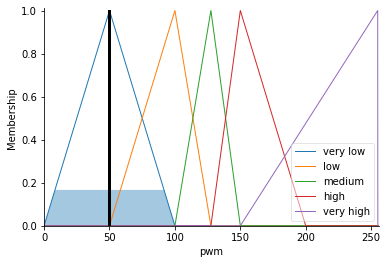

In [ ]:
# Test an instance
tempFIS_pred.input['setpoint'] =  12.5    # Setpoint: 12.5 degree Celsius
tempFIS_pred.input['sensor']   =  39.5    # Read from sensor: 39.5 degree Celsius
tempFIS_pred.compute()

# Print
temp_res = tempFIS_pred.output['pwm']
dis_str = "Predicted: {val}".format(val = temp_res)   # Print predicted value
print(dis_str)
pwm.view(sim = tempFIS_pred)   # Display on graph

Predicted: 159.9826007325999


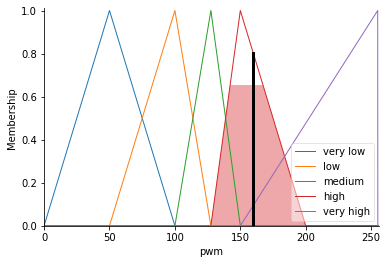

In [ ]:
# Test an instance
tempFIS_pred.input['setpoint'] =  35.5    # Setpoint: 35.5 degree Celsius
tempFIS_pred.input['sensor']   =  20.5    # Read from sensor: 20.5 degree Celsius
tempFIS_pred.compute()

# Print
temp_res = tempFIS_pred.output['pwm']
dis_str = "Predicted: {val}".format(val = temp_res)   # Print predicted value
print(dis_str)
pwm.view(sim = tempFIS_pred)   # Display on graph

Predicted: 49.99999999999997


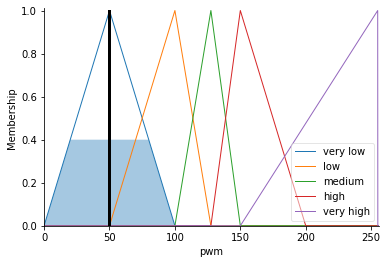

In [ ]:
# Test an instance
tempFIS_pred.input['setpoint'] =  18.0    # Setpoint: 18.0 degree Celsius
tempFIS_pred.input['sensor']   =  50.0    # Read from sensor: 50.0 degree Celsius
tempFIS_pred.compute()

# Print
temp_res = tempFIS_pred.output['pwm']
dis_str = "Predicted: {val}".format(val = temp_res)   # Print predicted value
print(dis_str)
pwm.view(sim = tempFIS_pred)   # Display on graph